In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid")


In [22]:
df = pd.read_csv('/Users/boubacar/Desktop/project/iManageTraffic/iManage-Traffic-App/Database/dataset.csv')
# Database/dataset.csv

/var/folders/4f/tdx8mbjj219cvnfmlth5jj5m0000gn/T/ipykernel_17627/1290223646.py:1: DtypeWarning: Columns (26,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/boubacar/Desktop/project/iManageTraffic/iManage-Traffic-App/Database/dataset.csv')


In [23]:
df.head()

,OBJECTID,SE_ANNO_CAD_DATA,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,HITPARKEDCAR,SPDCASENO,Source of the collision report,Source description,Added date,Modified date,SHAREDMICROMOBILITYCD,SHAREDMICROMOBILITYDESC,x,y
0,35530039,System.Byte[],378041,379561,EF49941,Unmatched,Block,NaN,WEST SEATTLE BR EB BETWEEN 26TH AV SW ON RP AN...,NaN,...,N,NaN,PTCR,Police Traffic Collision Report,1/2/2025 12:00:00 AM,1/2/2025 12:00:00 AM,U,Unknown,1.261582e+06,212237.206477
1,35530040,System.Byte[],374133,375653,EE67897,Matched,Block,NaN,RAINIER AVE S BETWEEN 75TH AVE S AND CITY LIMITS,NaN,...,N,2024-94198,PTCR,Police Traffic Collision Report,8/26/2024 12:00:00 AM,8/26/2024 12:00:00 AM,U,Unknown,1.293052e+06,189388.287350
2,35530041,System.Byte[],371105,372585,EE63039,Matched,Block,NaN,15TH AVE W BETWEEN W EMERSON ST AND BALLARD BR,NaN,...,N,2024-82001,PTCR,Police Traffic Collision Report,4/16/2024 12:00:00 AM,8/5/2024 12:00:00 AM,NaN,NaN,1.260185e+06,242449.150060
3,35530042,System.Byte[],377578,379098,EF30197,Unmatched,Block,NaN,43RD AVE S BETWEEN S OTHELLO ST AND S WEBSTER ST,NaN,...,N,NaN,CVCR,Citizen Vehicle Collision Report,12/19/2024 12:00:00 AM,NaN,U,Unknown,1.283240e+06,198921.318784
4,35530043,System.Byte[],377662,379182,EF09870,Matched,Intersection,24770.0,RAVENNA AVE NE AND NE 73RD ST,NaN,...,Y,2024-222603,PTCR,Police Traffic Collision Report,12/23/2024 12:00:00 AM,12/23/2024 12:00:00 AM,U,Unknown,1.278182e+06,251952.525238


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254269 entries, 0 to 254268
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   OBJECTID                        254269 non-null  int64  
 1   SE_ANNO_CAD_DATA                254269 non-null  object 
 2   INCKEY                          254269 non-null  int64  
 3   COLDETKEY                       254269 non-null  int64  
 4   REPORTNO                        254269 non-null  object 
 5   STATUS                          254269 non-null  object 
 6   ADDRTYPE                        250280 non-null  object 
 7   INTKEY                          85245 non-null   float64
 8   LOCATION                        249330 non-null  object 
 9   EXCEPTRSNCODE                   13049 non-null   object 
 10  EXCEPTRSNDESC                   13049 non-null   object 
 11  SEVERITYCODE                    254268 non-null  object 
 12  SEVERITYDESC    

In [25]:
df.describe()


,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,STCOLCODE,SEGLANEKEY,CROSSWALKKEY,x,y
count,2.542690e+05,254269.000000,254269.000000,85245.000000,254269.000000,254269.000000,254269.000000,254269.000000,254269.000000,254269.000000,254269.000000,254268.000000,1.272050e+05,219125.000000,254269.000000,2.542690e+05,2.461560e+05,246156.000000
mean,3.565717e+07,172060.296969,172451.504733,38385.434289,2.235727,0.039199,0.028073,1.689797,0.375103,0.017128,0.002025,13.579141,7.971063e+06,22.653225,235.279633,8.545954e+03,1.271167e+06,229625.907893
std,7.340128e+04,109441.540188,109981.479270,55327.217568,1.437541,0.204373,0.166674,0.867048,0.725231,0.162381,0.048250,7.670131,2.611523e+06,14.688641,3069.345358,6.756324e+04,7.377965e+03,20628.708739
min,3.553004e+07,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000,0.000000e+00,1.248139e+06,184059.089009
25%,3.559361e+07,79856.000000,79856.000000,28681.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,11.000000,0.000000,0.000000e+00,1.266707e+06,213477.939983
50%,3.565717e+07,143858.000000,143858.000000,30124.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,12.000000,8.033011e+06,15.000000,0.000000,0.000000e+00,1.271158e+06,228164.488734
75%,3.572074e+07,252319.000000,252919.000000,34105.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,32.000000,0.000000,0.000000e+00,1.276050e+06,245894.883504
max,3.578431e+07,380360.000000,381880.000000,858453.000000,93.000000,6.000000,3.000000,15.000000,78.000000,41.000000,5.000000,125.000000,1.307202e+07,88.000000,525241.000000,5.239700e+06,1.293052e+06,271525.414794


In [26]:
# 3. Feature Engineering
# Convert datetime and extract components
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], errors='coerce')
df['hour'] = df['INCDTTM'].dt.hour
df['dayofweek'] = df['INCDTTM'].dt.dayofweek
df['month'] = df['INCDTTM'].dt.month

In [27]:
# Fill missing and encode categorical input features
df['WEATHER'] = df['WEATHER'].fillna("Unknown")
df['ROADCOND'] = df['ROADCOND'].fillna("Unknown")
df['LIGHTCOND'] = df['LIGHTCOND'].fillna("Unknown")

In [28]:
# Fill and prepare the target feature
df['LOCATION'] = df['LOCATION'].fillna("Unknown")


In [29]:
# Encode categorical input features
le_weather = LabelEncoder()
le_road = LabelEncoder()
le_light = LabelEncoder()
df['WEATHER'] = le_weather.fit_transform(df['WEATHER'])
df['ROADCOND'] = le_road.fit_transform(df['ROADCOND'])
df['LIGHTCOND'] = le_light.fit_transform(df['LIGHTCOND'])

In [30]:
# Select top N most frequent locations for classification
top_locations = df['LOCATION'].value_counts().nlargest(10).index
df = df[df['LOCATION'].isin(top_locations)]
le_location = LabelEncoder()
df['LOCATION'] = le_location.fit_transform(df['LOCATION'])

In [31]:
# Select features and target
features = ['hour', 'dayofweek', 'month', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
target = 'LOCATION'
X = df[features]
y = df[target]

print("Sample features:")
print(X.head())

Sample features:
     hour  dayofweek  month  WEATHER  ROADCOND  LIGHTCOND
10    NaN        NaN    NaN        5         8          5
97    0.0        5.0    3.0       11         7          8
114   0.0        1.0   12.0       11         7          8
176   0.0        1.0   12.0       11         7          8
179   0.0        1.0   12.0       11         7          8


In [32]:
# -----------------------------------------------------
# 4. Train-Test Split & Train Model
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# 5. Evaluate Model
# -----------------------------------------------------
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[  0   0   1   0   0   0   1   0  56   0]
 [  1   2   0   0   3   0   1   0  41   1]
 [  0   0   1   2   3   0   1   0  74   0]
 [  1   2   0   1   0   1   0   1  57   0]
 [  0   1   0   1   6   4   1   1  59   2]
 [  2   1   0   0   4   5   0   0  37   0]
 [  0   0   0   1   2   0   1   0  57   1]
 [  0   1   0   1   1   0   0   0  52   0]
 [  2   3   6   4  14   3   1   1 932   3]
 [  1   1   3   2   5   1   0   0  48   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.18      0.04      0.07        49
           2       0.09      0.01      0.02        81
           3       0.08      0.02      0.03        63
           4       0.16      0.08      0.11        75
           5       0.36      0.10      0.16        49
           6       0.17      0.02      0.03        62
           7       0.00      0.00      0.00        55
           8       0.66      0.96      0

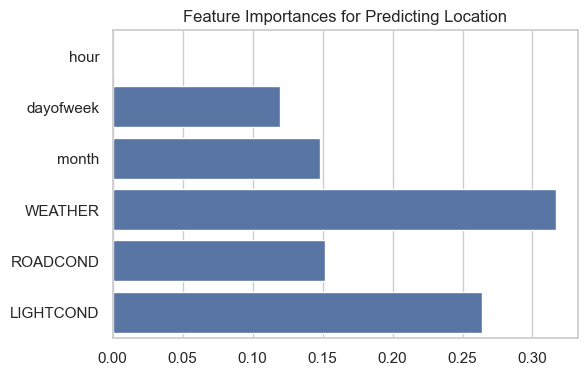

In [35]:
# 6. Feature Importance
# -----------------------------------------------------
importances = model.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances for Predicting Location")
plt.show()
